In [1]:
# Set seeds
from numpy.random import seed
import tensorflow as tf
seed(42)
tf.random.set_seed(42)

In [2]:
# Import modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import statistics

from google.colab import drive
from platform import python_version
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from tabulate import tabulate

%matplotlib inline

# Versions
print("Version Python:",python_version())
print()
print("Version Matplotlib:",matplotlib.__version__)
print("Version NumPy:",np.__version__)
print("Version Pandas:",pd.__version__)
print("Version Scikit-learn:",sklearn.__version__)
print("Version Seaborn:",sns.__version__)
print("Version Scikit-learn:",sklearn.__version__)
print("Version TensorFlow:",tf.__version__)

Version Python: 3.7.10

Version Matplotlib: 3.2.2
Version NumPy: 1.19.5
Version Pandas: 1.1.5
Version Scikit-learn: 0.22.2.post1
Version Seaborn: 0.11.1
Version Scikit-learn: 0.22.2.post1
Version TensorFlow: 2.5.0


In [3]:
# Set data folder and load dataframe
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/'
data = pd.read_pickle(os.path.join(data_folder, 'data.pkl'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load multiclass model output
with open(os.path.join(data_folder, 'eval_bm.pkl'), 'rb') as f:
    bm_loss_train,bm_accuracy_train,bm_loss_validation,bm_accuracy_validation,bm_loss_test,bm_accuracy_test,bm_y_test,bm_y_pred_probs,bm_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_mm.pkl'), 'rb') as f:
    mm_loss_train,mm_accuracy_train,mm_loss_validation,mm_accuracy_validation,mm_loss_test,mm_accuracy_test,mm_y_test,mm_y_pred_probs,mm_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_age_young.pkl'), 'rb') as f:
    bm_age_young_loss_train,bm_age_young_accuracy_train,bm_age_young_loss_validation,bm_age_young_accuracy_validation,bm_age_young_loss_test,bm_age_young_accuracy_test,bm_age_young_y_test,bm_age_young_y_pred_probs,bm_age_young_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_age_old.pkl'), 'rb') as f:
    bm_age_old_loss_train,bm_age_old_accuracy_train,bm_age_old_loss_validation,bm_age_old_accuracy_validation,bm_age_old_loss_test,bm_age_old_accuracy_test,bm_age_old_y_test,bm_age_old_y_pred_probs,bm_age_old_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_sex_male.pkl'), 'rb') as f:
    bm_sex_male_loss_train,bm_sex_male_accuracy_train,bm_sex_male_sex_male_loss_validation,bm_sex_male_accuracy_validation,bm_sex_male_loss_test,bm_sex_male_accuracy_test,bm_sex_male_y_test,bm_sex_male_y_pred_probs,bm_sex_male_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_sex_female.pkl'), 'rb') as f:
    bm_sex_female_loss_train,bm_sex_female_accuracy_train,bm_sex_female_loss_validation,bm_sex_female_accuracy_validation,bm_sex_female_loss_test,bm_sex_female_accuracy_test,bm_sex_female_y_test,bm_sex_female_y_pred_probs,bm_sex_female_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_loc_sun.pkl'), 'rb') as f:
    bm_loc_sun_loss_train,bm_loc_sun_accuracy_train,bm_loc_sun_loss_validation,bm_loc_sun_accuracy_validation,bm_loc_sun_loss_test,bm_loc_sun_accuracy_test,bm_loc_sun_y_test,bm_loc_sun_y_pred_probs,bm_loc_sun_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bm_loc_no_sun.pkl'), 'rb') as f:
    bm_loc_no_sun_loss_train,bm_loc_no_sun_accuracy_train,bm_loc_no_sun_loss_validation,bm_loc_no_sun_accuracy_validation,bm_loc_no_sun_loss_test,bm_loc_no_sun_accuracy_test,bm_loc_no_sun_y_test,bm_loc_no_sun_y_pred_probs,bm_loc_no_sun_y_pred = pickle.load(f)

# Load binary model output
with open(os.path.join(data_folder, 'eval_bb.pkl'), 'rb') as f:
    bb_loss_train,bb_accuracy_train,bb_loss_validation,bb_accuracy_validation,bb_loss_test,bb_accuracy_test,bb_y_test,bb_y_pred_probs,bb_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_mb.pkl'), 'rb') as f:
    mb_loss_train,mb_accuracy_train,mb_loss_validation,mb_accuracy_validation,mb_loss_test,mb_accuracy_test,mb_y_test,mb_y_pred_probs,mb_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_age_young.pkl'), 'rb') as f:
    bb_age_young_loss_train,bb_age_young_accuracy_train,bb_age_young_loss_validation,bb_age_young_accuracy_validation,bb_age_young_loss_test,bb_age_young_accuracy_test,bb_age_young_y_test,bb_age_young_y_pred_probs,bb_age_young_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_age_old.pkl'), 'rb') as f:
    bb_age_old_loss_train,bb_age_old_accuracy_train,bb_age_old_loss_validation,bb_age_old_accuracy_validation,bb_age_old_loss_test,bb_age_old_accuracy_test,bb_age_old_y_test,bb_age_old_y_pred_probs,bb_age_old_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_sex_male.pkl'), 'rb') as f:
    bb_sex_male_loss_train,bb_sex_male_accuracy_train,bb_sex_male_sex_male_loss_validation,bb_sex_male_accuracy_validation,bb_sex_male_loss_test,bb_sex_male_accuracy_test,bb_sex_male_y_test,bb_sex_male_y_pred_probs,bb_sex_male_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_sex_female.pkl'), 'rb') as f:
    bb_sex_female_loss_train,bb_sex_female_accuracy_train,bb_sex_female_loss_validation,bb_sex_female_accuracy_validation,bb_sex_female_loss_test,bb_sex_female_accuracy_test,bb_sex_female_y_test,bb_sex_female_y_pred_probs,bb_sex_female_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_loc_sun.pkl'), 'rb') as f:
    bb_loc_sun_loss_train,bb_loc_sun_accuracy_train,bb_loc_sun_loss_validation,bb_loc_sun_accuracy_validation,bb_loc_sun_loss_test,bb_loc_sun_accuracy_test,bb_loc_sun_y_test,bb_loc_sun_y_pred_probs,bb_loc_sun_y_pred = pickle.load(f)
with open(os.path.join(data_folder, 'eval_bb_loc_no_sun.pkl'), 'rb') as f:
    bb_loc_no_sun_loss_train,bb_loc_no_sun_accuracy_train,bb_loc_no_sun_loss_validation,bb_loc_no_sun_accuracy_validation,bb_loc_no_sun_loss_test,bb_loc_no_sun_accuracy_test,bb_loc_no_sun_y_test,bb_loc_no_sun_y_pred_probs,bb_loc_no_sun_y_pred = pickle.load(f)

In [5]:
# Descriptive table of lesions
lesions = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

lesion_type = {
    'akiec': 'Malignant',
    'bcc': 'Malignant', 
    'bkl': 'Benign',
    'df': 'Benign',
    'mel': 'Malignant',
    'nv': 'Benign',
    'vasc': 'Benign'   
}

lesion_count = {
    'akiec': len(data[data['dx'] == 'akiec']),
    'bcc': len(data[data['dx'] == 'bcc']),
    'bkl': len(data[data['dx'] == 'bkl']),
    'df': len(data[data['dx'] == 'df']),
    'mel': len(data[data['dx'] == 'mel']),
    'nv': len(data[data['dx'] == 'nv']),
    'vasc': len(data[data['dx'] == 'vasc'])
}

lesion_pct = {
    'akiec':str(round(len(data[data['dx'] == 'akiec'])/len(data)*100,2))+'%',
    'bcc':str(round(len(data[data['dx'] == 'bcc'])/len(data)*100,2))+'%',
    'bkl':str(round(len(data[data['dx'] == 'bkl'])/len(data)*100,2))+'%',
    'df':str(round(len(data[data['dx'] == 'df'])/len(data)*100,2))+'%',
    'mel':str(round(len(data[data['dx'] == 'mel'])/len(data)*100,2))+'%',
    'nv': str(round(len(data[data['dx'] == 'nv'])/len(data)*100,2))+'%',
    'vasc': str(round(len(data[data['dx'] == 'vasc'])/len(data)*100,2))+'%',
}

dx = list(lesions.keys())
dx_full = list(lesions.values())
lesion_type = list(lesion_type.values())
lesion_count = list(lesion_count.values())
lesion_pct = list(lesion_pct.values())

dx_table = {'Full name': dx_full, 'dx': dx, 'Type': lesion_type, 'Count': lesion_count, '% of total': lesion_pct }
print(tabulate(dx_table, headers='keys'))

Full name                      dx     Type         Count  % of total
-----------------------------  -----  ---------  -------  ------------
Actinic keratoses              akiec  Malignant      327  3.35%
Basal cell carcinoma           bcc    Malignant      509  5.21%
Benign keratosis-like lesions  bkl    Benign        1076  11.02%
Dermatofibroma                 df     Benign         115  1.18%
Melanoma                       mel    Malignant     1101  11.28%
Melanocytic nevi               nv     Benign        6491  66.5%
Vascular lesions               vasc   Benign         142  1.45%


In [30]:
# Descriptive table of metadata
mal = data[data.lesion_type == 'Malignant']
ben = data[data.lesion_type == 'Benign']
young_mal = mal[mal.age < 50]
old_mal = mal[mal.age >= 50]
young_ben = ben[ben.age < 50]
old_ben = ben[ben.age >= 50]

younger_mal = str(len(young_mal)) + ' (' + str(round(len(young_mal)/len(mal)*100,1)) + ')'
older_mal = str(len(old_mal)) + ' (' + str(round(len(old_mal)/len(mal)*100,1)) + ')'
younger_ben = str(len(young_ben)) + ' (' + str(round(len(young_ben)/len(ben)*100,1)) + ')'
older_ben = str(len(old_ben)) + ' (' + str(round(len(old_ben)/len(ben)*100,1)) + ')'

male_mal = mal[mal.sex == 'male']
female_mal = mal[mal.sex == 'female']
male_ben = ben[ben.sex == 'male']
female_ben = ben[ben.sex == 'female']

males_mal =   str(len(male_mal)) + ' (' + str(round(len(male_mal)/len(mal)*100,1)) + ')'
females_mal = str(len(female_mal)) + ' (' + str(round(len(female_mal)/len(mal)*100,1)) + ')'
males_ben =   str(len(male_ben)) + ' (' + str(round(len(male_ben)/len(ben)*100,1)) + ')'
females_ben = str(len(female_ben)) + ' (' + str(round(len(female_ben)/len(ben)*100,1)) + ')'

sun_mal = mal[mal.loc_cat == 1]
no_sun_mal = mal[mal.loc_cat == 0]
sun_ben = ben[ben.loc_cat == 1]
no_sun_ben = ben[ben.loc_cat == 0]

suns_mal = str(len(sun_mal)) + ' (' + str(round(len(sun_mal)/len(mal)*100,1)) + ')'
no_suns_mal = str(len(no_sun_mal)) + ' (' + str(round(len(no_sun_mal)/len(mal)*100,1)) + ')'
suns_ben = str(len(sun_ben)) + ' (' + str(round(len(sun_ben)/len(ben)*100,1)) + ')'
no_suns_ben = str(len(no_sun_ben)) + ' (' + str(round(len(no_sun_ben)/len(ben)*100,1)) + ')'

var = ['Age group, n (%)',' <  50','>= 50','','Gender, n (%)','Male','Female','','Localization, n (%)','Sun-exposed','Covered']
mali = ['',younger_mal,older_mal,'','',males_mal,females_mal,'','',suns_mal,no_suns_mal]
beni = ['',younger_ben,older_ben,'','',males_ben,females_ben,'','',suns_ben,no_suns_ben]

metadata_table = {'Variables': var, 'Malignant': mali, 'Benign': beni}
print(tabulate(metadata_table, headers='keys'))

Variables            Malignant    Benign
-------------------  -----------  -----------
Age group, n (%)
<  50                294 (15.2)   3733 (47.7)
>= 50                1643 (84.8)  4091 (52.3)

Gender, n (%)
Male                 1213 (62.6)  4095 (52.3)
Female               724 (37.4)   3729 (47.7)

Localization, n (%)
Sun-exposed          1091 (56.3)  3287 (42.0)
Covered              846 (43.7)   4537 (58.0)


In [20]:
# Make lists of model variables
multiclass_variables = [
[bm_loss_train,bm_accuracy_train,bm_loss_validation,bm_accuracy_validation,bm_loss_test,bm_accuracy_test,bm_y_test,bm_y_pred_probs,bm_y_pred],
[mm_loss_train,mm_accuracy_train,mm_loss_validation,mm_accuracy_validation,mm_loss_test,mm_accuracy_test,mm_y_test,mm_y_pred_probs,mm_y_pred],
[bm_age_young_loss_train,bm_age_young_accuracy_train,bm_age_young_loss_validation,bm_age_young_accuracy_validation,bm_age_young_loss_test,bm_age_young_accuracy_test,bm_age_young_y_test,bm_age_young_y_pred_probs,bm_age_young_y_pred],
[bm_age_old_loss_train,bm_age_old_accuracy_train,bm_age_old_loss_validation,bm_age_old_accuracy_validation,bm_age_old_loss_test,bm_age_old_accuracy_test,bm_age_old_y_test,bm_age_old_y_pred_probs,bm_age_old_y_pred],
[bm_sex_male_loss_train,bm_sex_male_accuracy_train,bm_sex_male_sex_male_loss_validation,bm_sex_male_accuracy_validation,bm_sex_male_loss_test,bm_sex_male_accuracy_test,bm_sex_male_y_test,bm_sex_male_y_pred_probs,bm_sex_male_y_pred],
[bm_sex_female_loss_train,bm_sex_female_accuracy_train,bm_sex_female_loss_validation,bm_sex_female_accuracy_validation,bm_sex_female_loss_test,bm_sex_female_accuracy_test,bm_sex_female_y_test,bm_sex_female_y_pred_probs,bm_sex_female_y_pred],
[bm_loc_sun_loss_train, bm_loc_sun_accuracy_train, bm_loc_sun_loss_validation, bm_loc_sun_accuracy_validation, bm_loc_sun_loss_test, bm_loc_sun_accuracy_test, bm_loc_sun_y_test, bm_loc_sun_y_pred_probs, bm_loc_sun_y_pred],
[bm_loc_no_sun_loss_train,bm_loc_no_sun_accuracy_train,bm_loc_no_sun_loss_validation,bm_loc_no_sun_accuracy_validation,bm_loc_no_sun_loss_test,bm_loc_no_sun_accuracy_test,bm_loc_no_sun_y_test,bm_loc_no_sun_y_pred_probs,bm_loc_no_sun_y_pred]]

multi_loss_train = [item[0] for item in multiclass_variables]
multi_accuracy_train = [item[1] for item in multiclass_variables]
multi_loss_validation = [item[2] for item in multiclass_variables]
multi_accuracy_validation = [item[3] for item in multiclass_variables]
multi_loss_test = [item[4] for item in multiclass_variables]
multi_accuracy_test = [item[5] for item in multiclass_variables]
multi_y_test = [item[6] for item in multiclass_variables]
multi_y_pred_probs = [item[7] for item in multiclass_variables]
multi_y_pred = [item[8] for item in multiclass_variables]

binary_variables = [
[bb_loss_train,bb_accuracy_train,bb_loss_validation,bb_accuracy_validation,bb_loss_test,bb_accuracy_test,bb_y_test,bb_y_pred_probs,bb_y_pred],
[mb_loss_train,mb_accuracy_train,mb_loss_validation,mb_accuracy_validation,mb_loss_test,mb_accuracy_test,mb_y_test,mb_y_pred_probs,mb_y_pred],
[bb_age_young_loss_train,bb_age_young_accuracy_train,bb_age_young_loss_validation,bb_age_young_accuracy_validation,bb_age_young_loss_test,bb_age_young_accuracy_test,bb_age_young_y_test,bb_age_young_y_pred_probs,bb_age_young_y_pred],
[bb_age_old_loss_train,bb_age_old_accuracy_train,bb_age_old_loss_validation,bb_age_old_accuracy_validation,bb_age_old_loss_test,bb_age_old_accuracy_test,bb_age_old_y_test,bb_age_old_y_pred_probs,bb_age_old_y_pred],
[bb_sex_male_loss_train,bb_sex_male_accuracy_train,bb_sex_male_sex_male_loss_validation,bb_sex_male_accuracy_validation,bb_sex_male_loss_test,bb_sex_male_accuracy_test,bb_sex_male_y_test,bb_sex_male_y_pred_probs,bb_sex_male_y_pred],
[bb_sex_female_loss_train,bb_sex_female_accuracy_train,bb_sex_female_loss_validation,bb_sex_female_accuracy_validation,bb_sex_female_loss_test,bb_sex_female_accuracy_test,bb_sex_female_y_test,bb_sex_female_y_pred_probs,bb_sex_female_y_pred],
[bb_loc_sun_loss_train,bb_loc_sun_accuracy_train,bb_loc_sun_loss_validation,bb_loc_sun_accuracy_validation,bb_loc_sun_loss_test,bb_loc_sun_accuracy_test,bb_loc_sun_y_test,bb_loc_sun_y_pred_probs,bb_loc_sun_y_pred],
[bb_loc_no_sun_loss_train,bb_loc_no_sun_accuracy_train,bb_loc_no_sun_loss_validation,bb_loc_no_sun_accuracy_validation,bb_loc_no_sun_loss_test,bb_loc_no_sun_accuracy_test,bb_loc_no_sun_y_test,bb_loc_no_sun_y_pred_probs,bb_loc_no_sun_y_pred]]

binary_loss_train = [item[0] for item in binary_variables]
binary_accuracy_train = [item[1] for item in binary_variables]
binary_loss_validation = [item[2] for item in binary_variables]
binary_accuracy_validation = [item[3] for item in binary_variables]
binary_loss_test = [item[4] for item in binary_variables]
binary_accuracy_test = [item[5] for item in binary_variables]
binary_y_test = [item[6] for item in binary_variables]
binary_y_pred_probs = [item[7] for item in binary_variables]
binary_y_pred = [item[8] for item in binary_variables]

In [31]:
# Multiclass training, validation and testing accuracies/losses 
models = ['Baseline','Multimodal','Age_Young','Age_Old','Sex_Male','Sex_Female','Loc_Sun','Loc_No_Sun']

multi_accuracy_train = [i * 100 for i in multi_accuracy_train]
multi_accuracy_train2 = [round(num, 2) for num in multi_accuracy_train]
multi_accuracy_validation = [i * 100 for i in multi_accuracy_validation]
multi_accuracy_validation2 = [round(num, 2) for num in multi_accuracy_validation]
multi_accuracy_test = [i * 100 for i in multi_accuracy_test]
multi_accuracy_test2 = [round(num, 2) for num in multi_accuracy_test]
multi_loss_train = [i * 100 for i in multi_loss_train]
multi_loss_train2 = [round(num, 2) for num in multi_loss_train]
multi_loss_validation = [i * 100 for i in multi_loss_validation]
multi_loss_validation2 = [round(num, 2) for num in multi_loss_validation]
multi_loss_test = [i * 100 for i in multi_loss_test]
multi_loss_test2 = [round(num, 2) for num in multi_loss_test]

# Binary training, validation and testing accuracies and losses
binary_accuracy_train = [i * 100 for i in binary_accuracy_train]
binary_accuracy_train2 = [round(num, 2) for num in binary_accuracy_train]
binary_accuracy_validation = [i * 100 for i in binary_accuracy_validation]
binary_accuracy_validation2 = [round(num, 2) for num in binary_accuracy_validation]
binary_accuracy_test = [i * 100 for i in binary_accuracy_test]
binary_accuracy_test2 = [round(num, 2) for num in binary_accuracy_test]
binary_loss_train = [i * 100 for i in binary_loss_train]
binary_loss_train2 = [round(num, 2) for num in binary_loss_train]
binary_loss_validation = [i * 100 for i in binary_loss_validation]
binary_loss_validation2 = [round(num, 2) for num in binary_loss_validation]
binary_loss_test = [i * 100 for i in binary_loss_test]
binary_loss_test2 = [round(num, 2) for num in binary_loss_test]

accuracies_losses_table_multi = {'Models': models, 'Training accuracy (%)': multi_accuracy_train2, 'Val. accuracy (%)': multi_accuracy_validation2, 
                                                   'Training loss': multi_loss_train2, 'Val. loss': multi_loss_validation2}

accuracies_losses_table_binary = {'Models': models, 'Training accuracy (%)': binary_accuracy_train2, 'Val. accuracy (%)': binary_accuracy_validation2,
                                                    'Training loss': binary_loss_train2, 'Val. loss': binary_loss_validation2}

print(tabulate(accuracies_losses_table_multi, headers='keys'))
print()
print(tabulate(accuracies_losses_table_binary, headers='keys'))

Models        Training accuracy (%)    Val. accuracy (%)    Training loss    Val. loss
----------  -----------------------  -------------------  ---------------  -----------
Baseline                      79.3                 80.12            57.22        58.22
Multimodal                    86.46                83.2             38.24        48.58
Age_Young                     93.98                82.84            15.29        52.08
Age_Old                       75.68                78.53            65.87        65.33
Sex_Male                      77.67                79.25            59.16        61.42
Sex_Female                    84.19                76.4             41.6         65.84
Loc_Sun                       78.35                80.09            58.77        65.51
Loc_No_Sun                    87.41                80.67            33.21        57.64

Models        Training accuracy (%)    Val. accuracy (%)    Training loss    Val. loss
----------  -----------------------  -----

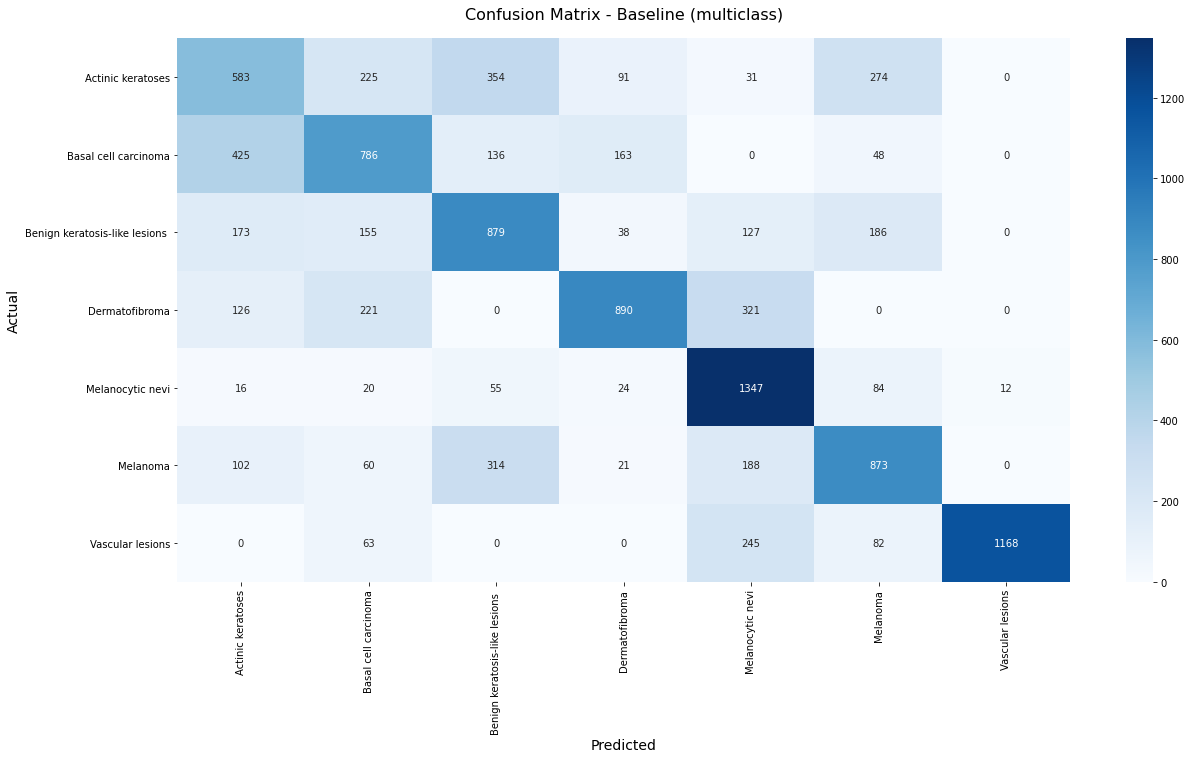

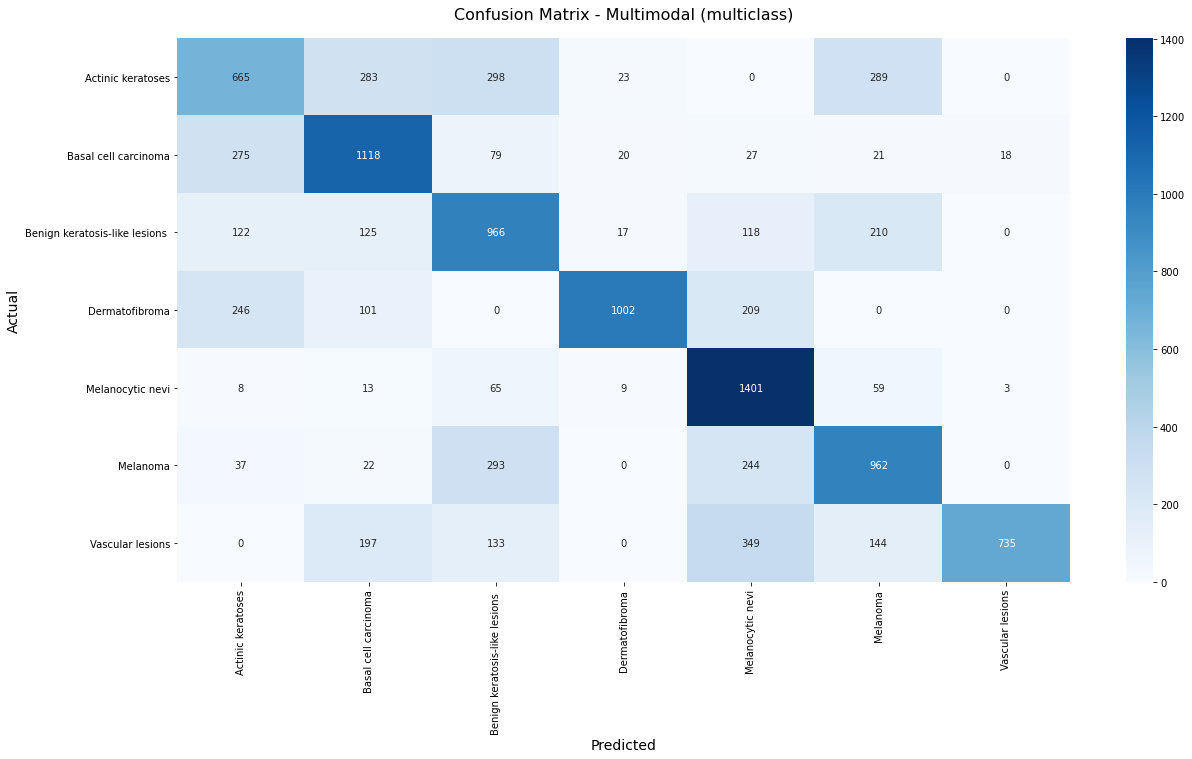

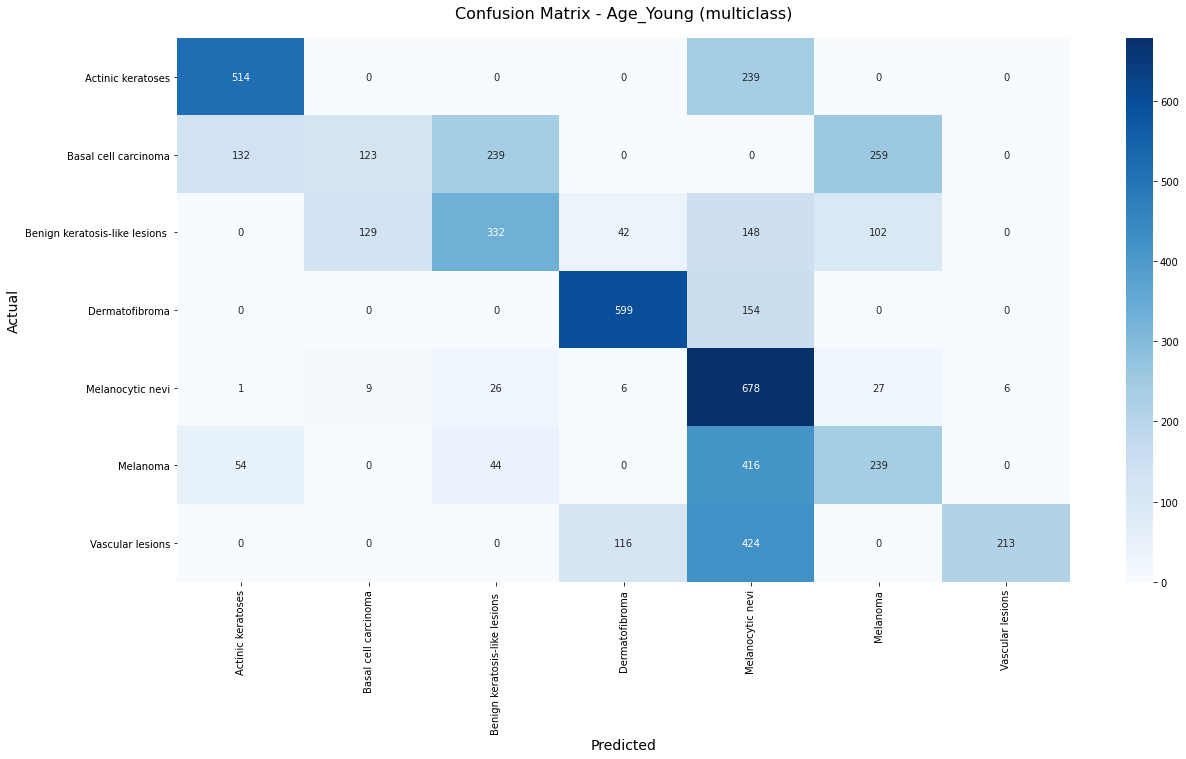

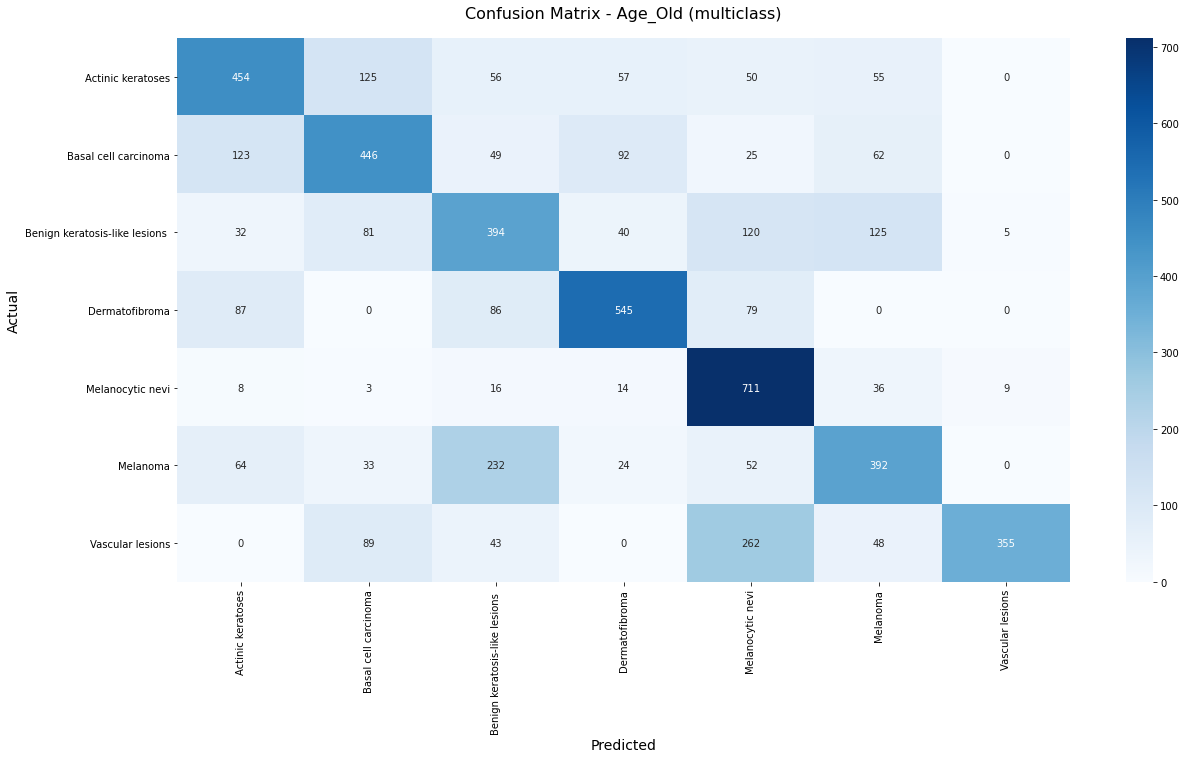

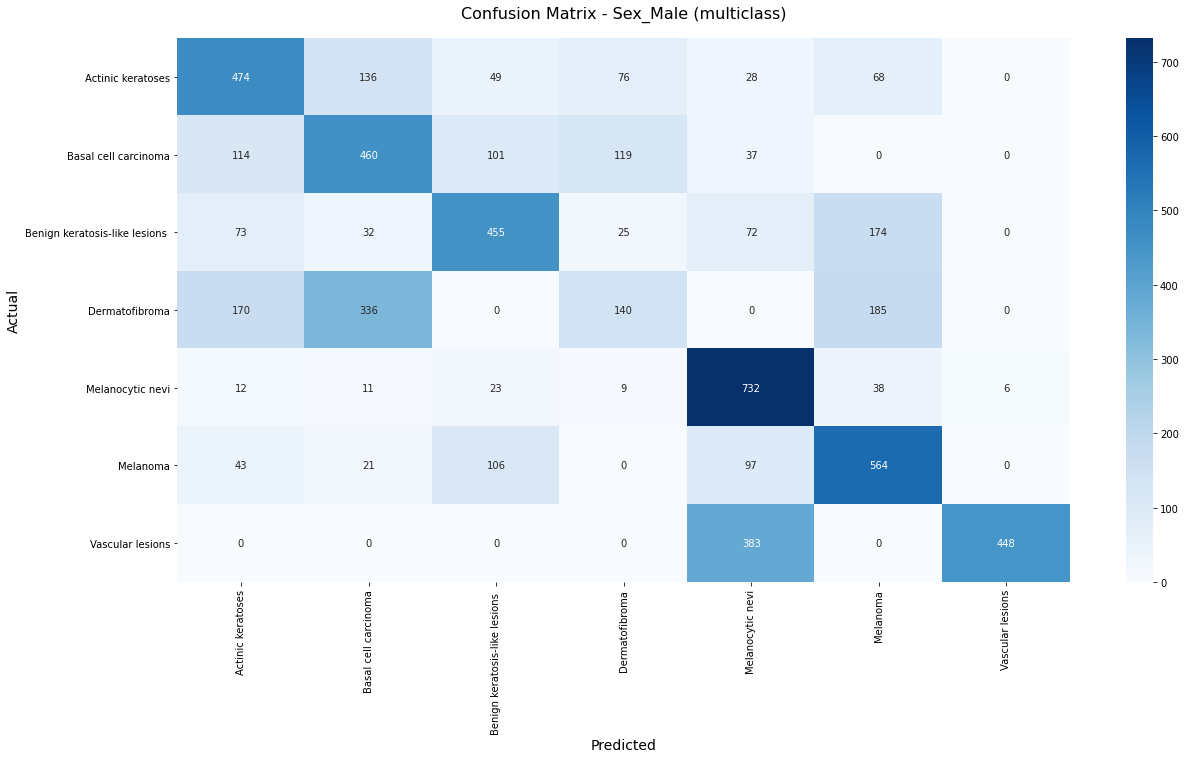

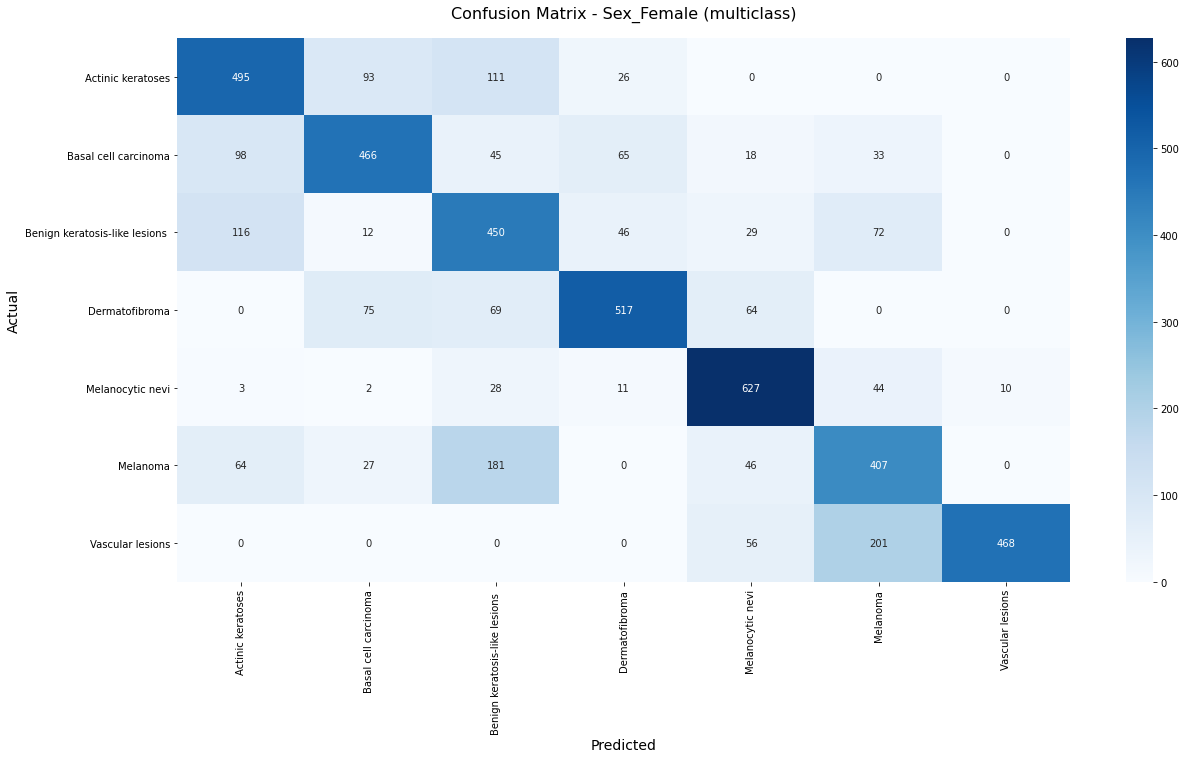

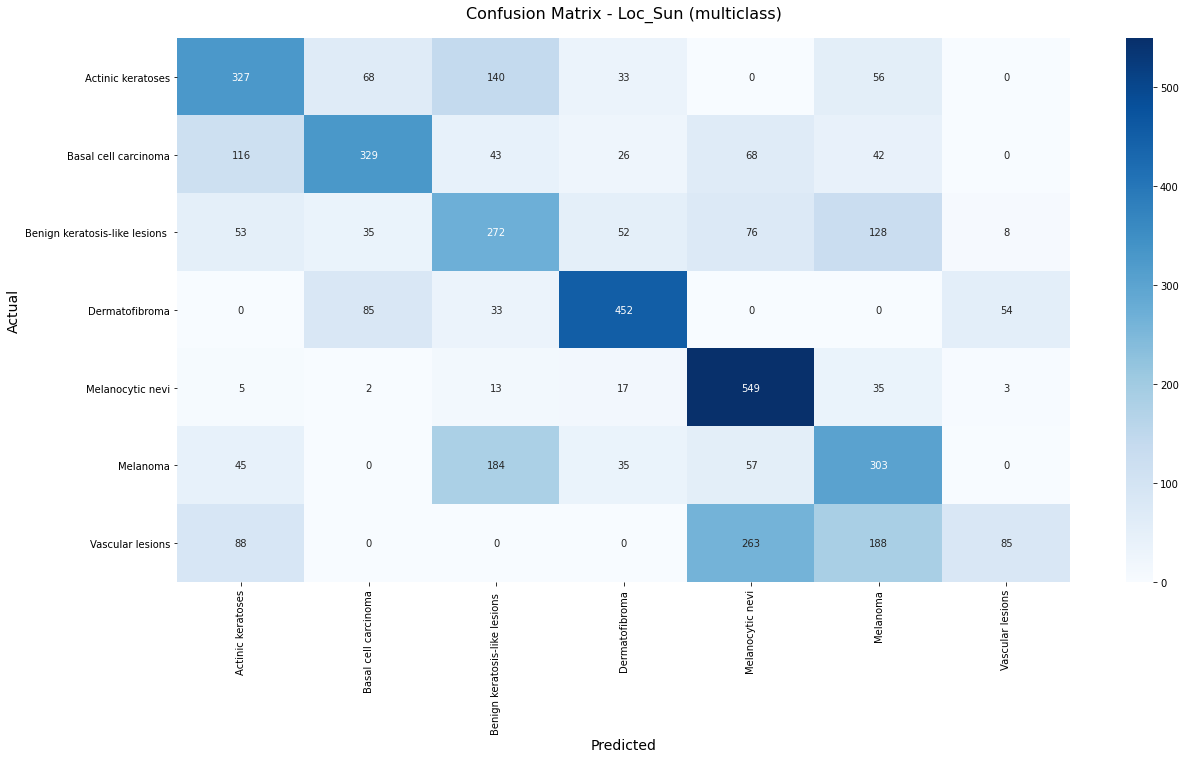

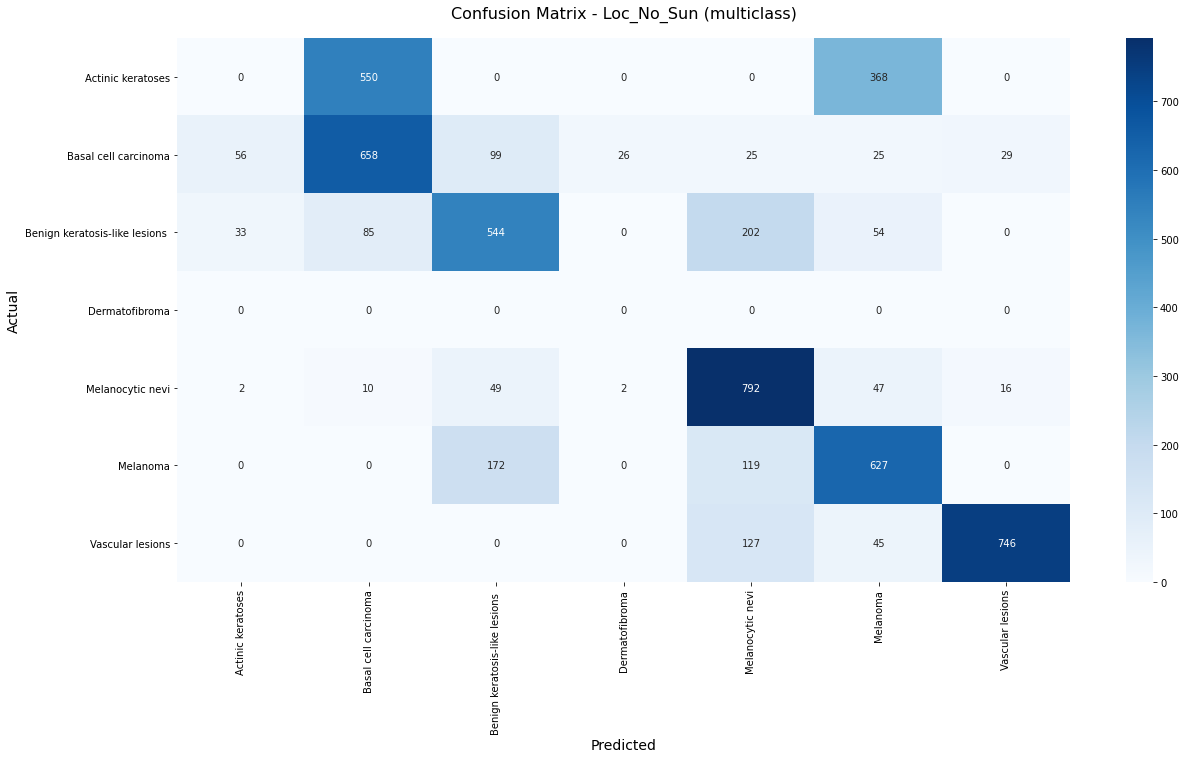

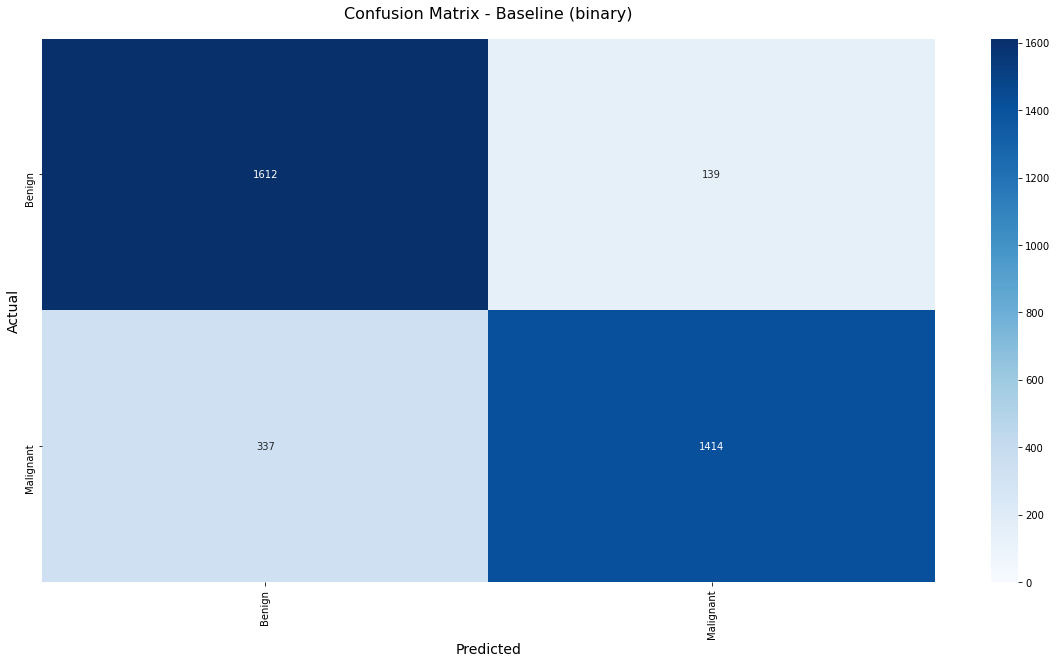

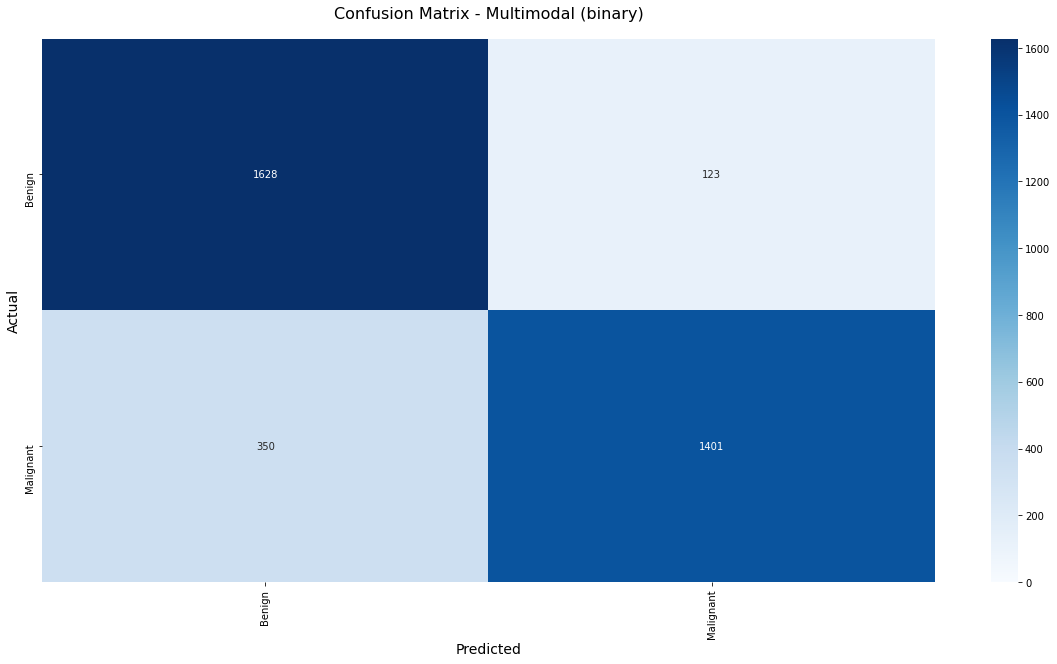

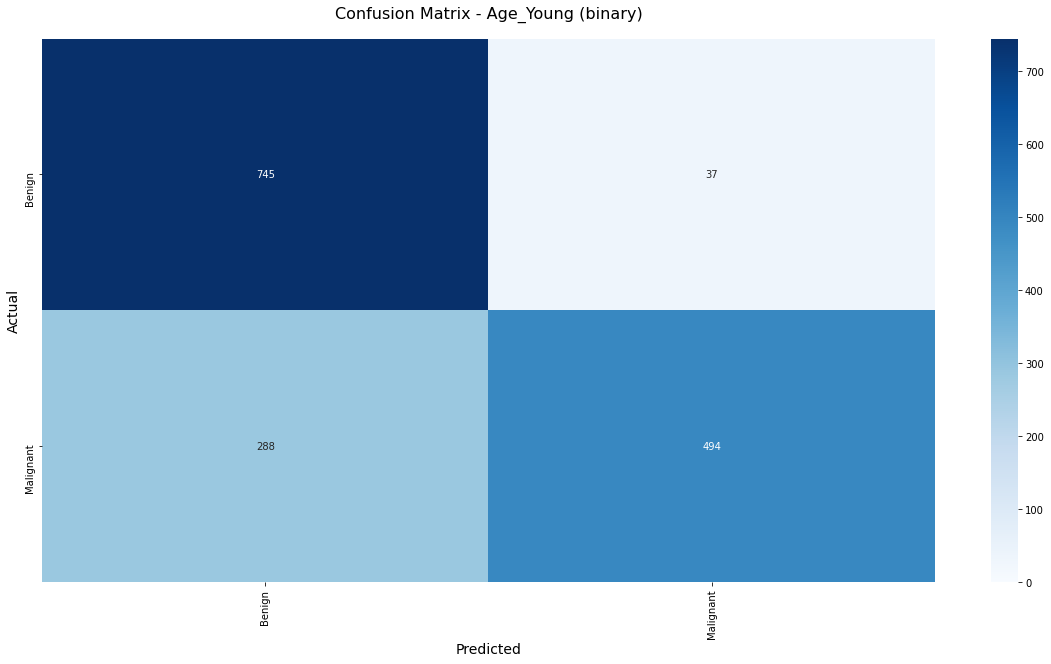

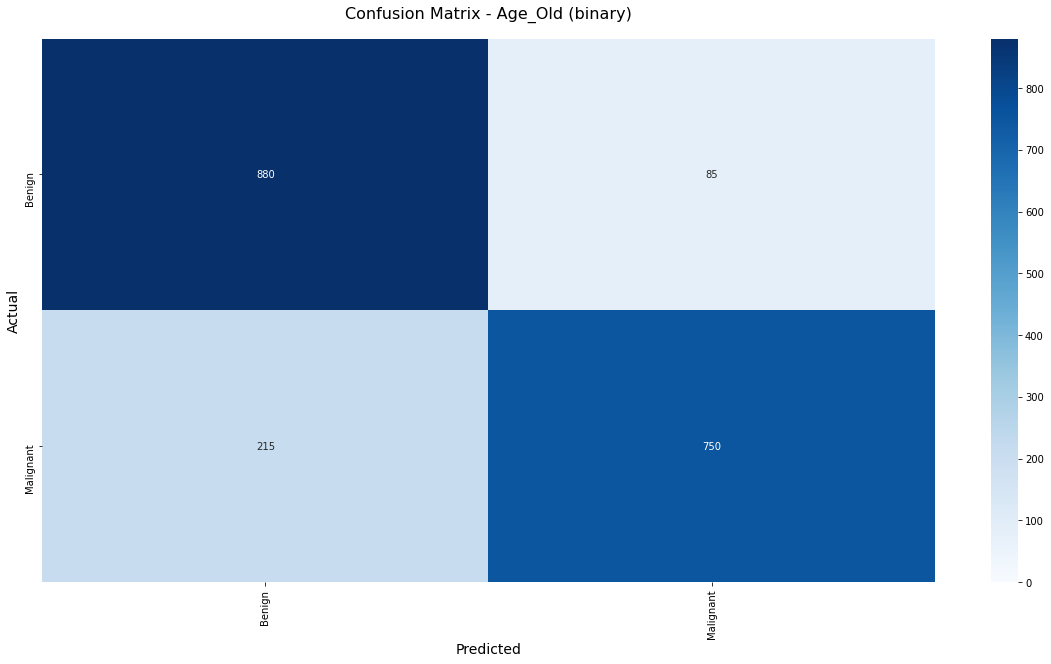

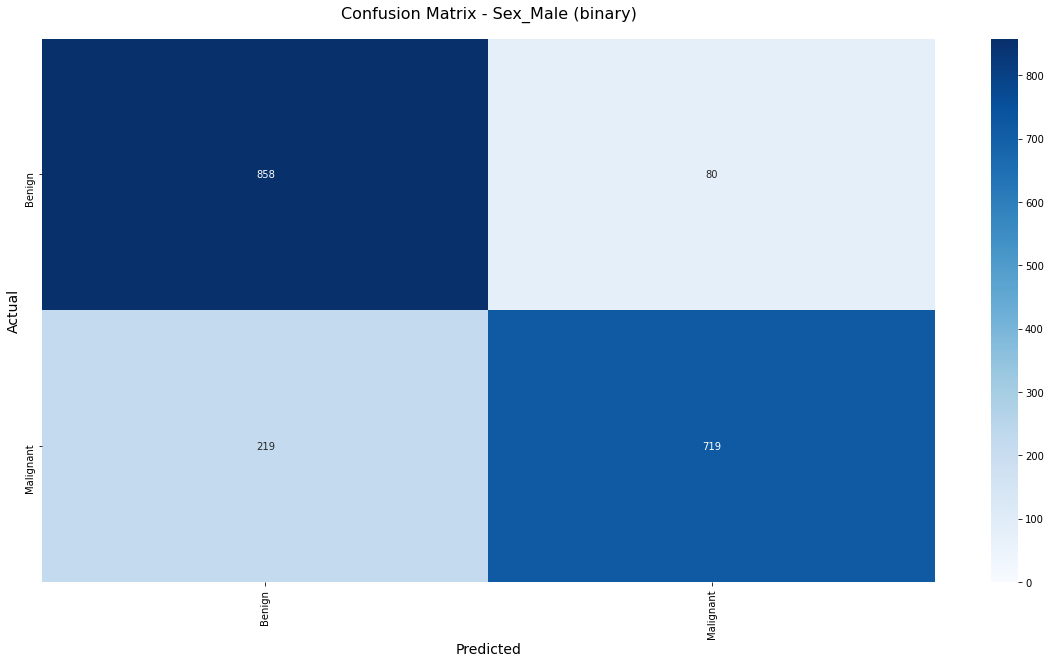

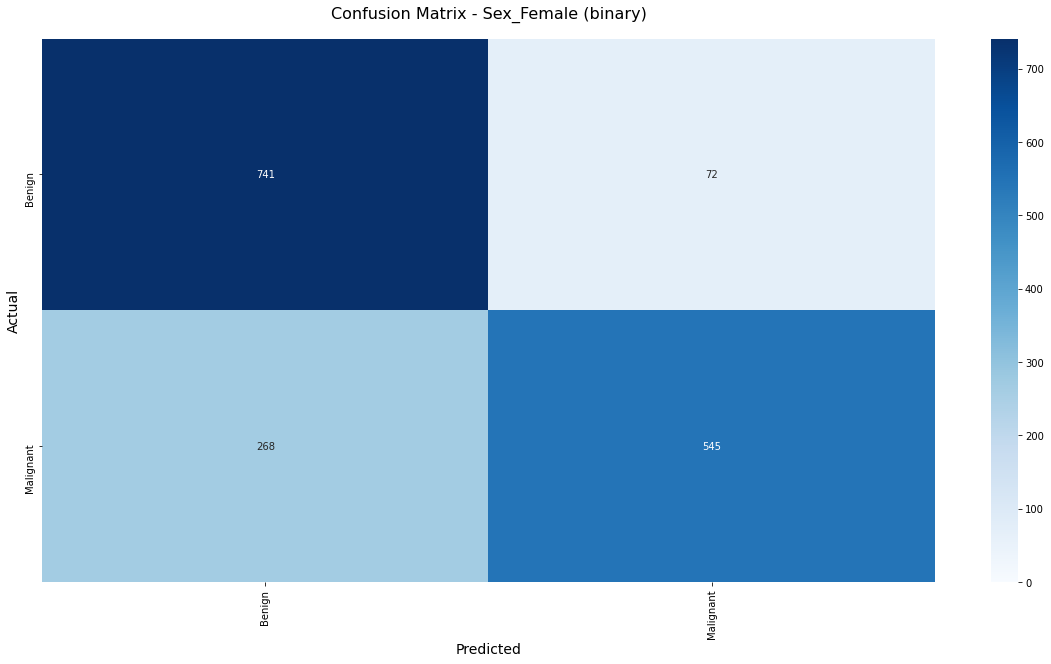

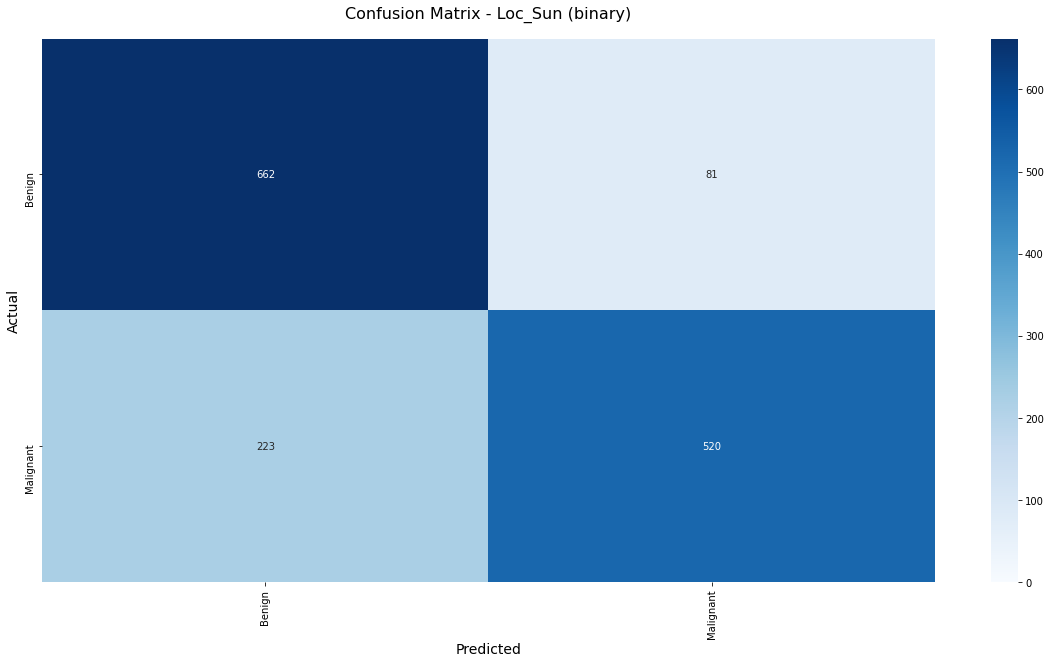

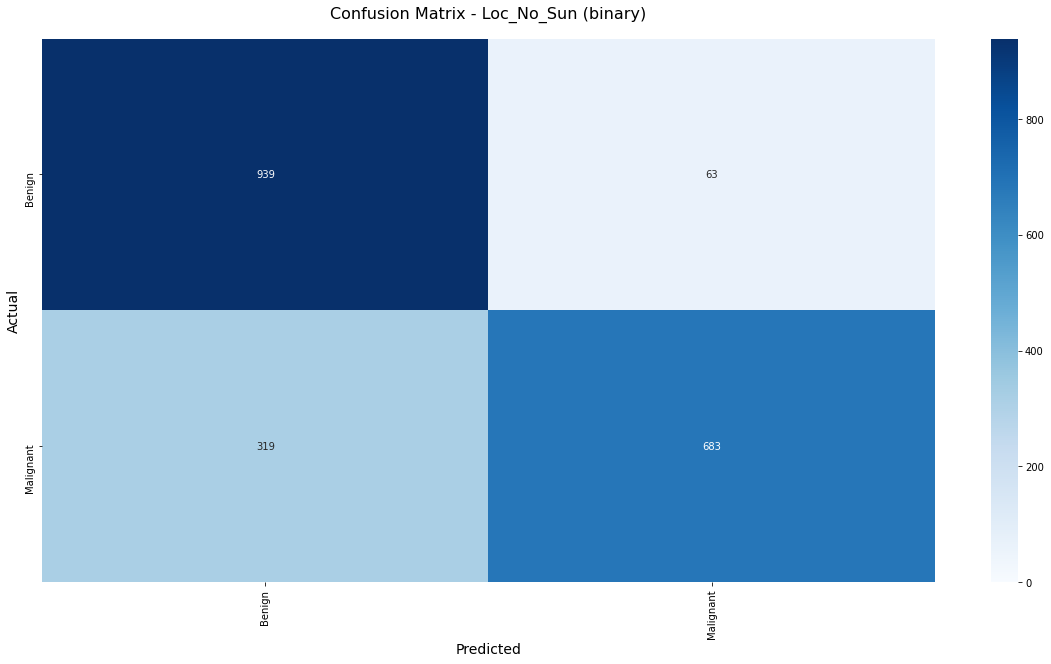

In [13]:
# Confusion Matrices

# Multiclass
lesions = ['Actinic keratoses', 'Basal cell carcinoma','Benign keratosis-like lesions ', 
              'Dermatofibroma', 'Melanocytic nevi','Melanoma','Vascular lesions']

def multi_conf_matrix(y_test,y_pred,tit):
  conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),columns = lesions, index = lesions)
  plt.figure(figsize=(20, 10))
  ax = sns.heatmap(conf_matrix, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
  ax.set_xlabel('Predicted',fontsize = 14)
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
  ax.set_ylabel('Actual',fontsize = 14)    
  ax.set_title('Confusion Matrix - ' + str(tit) + ' (multiclass)',fontsize = 16,pad=20);
  filename = ('Confusion Matrix - ' + str(tit) + ' (multiclass).png')
  plt.savefig(os.path.join(data_folder,filename), dpi=600)
  plt.show()

for i in range(len(multi_y_test)):
  multi_conf_matrix(multi_y_test[i],multi_y_pred[i],models[i])

lesion_types = ['Benign', 'Malignant']

# Binary 
def binary_conf_matrix(y_test,y_pred,tit):
  conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),columns = lesion_types, index = lesion_types)
  plt.figure(figsize=(20, 10))
  ax = sns.heatmap(conf_matrix, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
  ax.set_xlabel('Predicted',fontsize = 14)
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
  ax.set_ylabel('Actual',fontsize = 14)    
  ax.set_title('Confusion Matrix - ' + str(tit) + ' (binary)',fontsize = 16,pad=20);
  filename = ('Confusion Matrix - ' + str(tit) + ' (binary).png')
  plt.savefig(os.path.join(data_folder,filename), dpi=600)
  plt.show()

for i in range(len(binary_y_test)):
  binary_conf_matrix(binary_y_test[i],binary_y_pred[i],models[i])



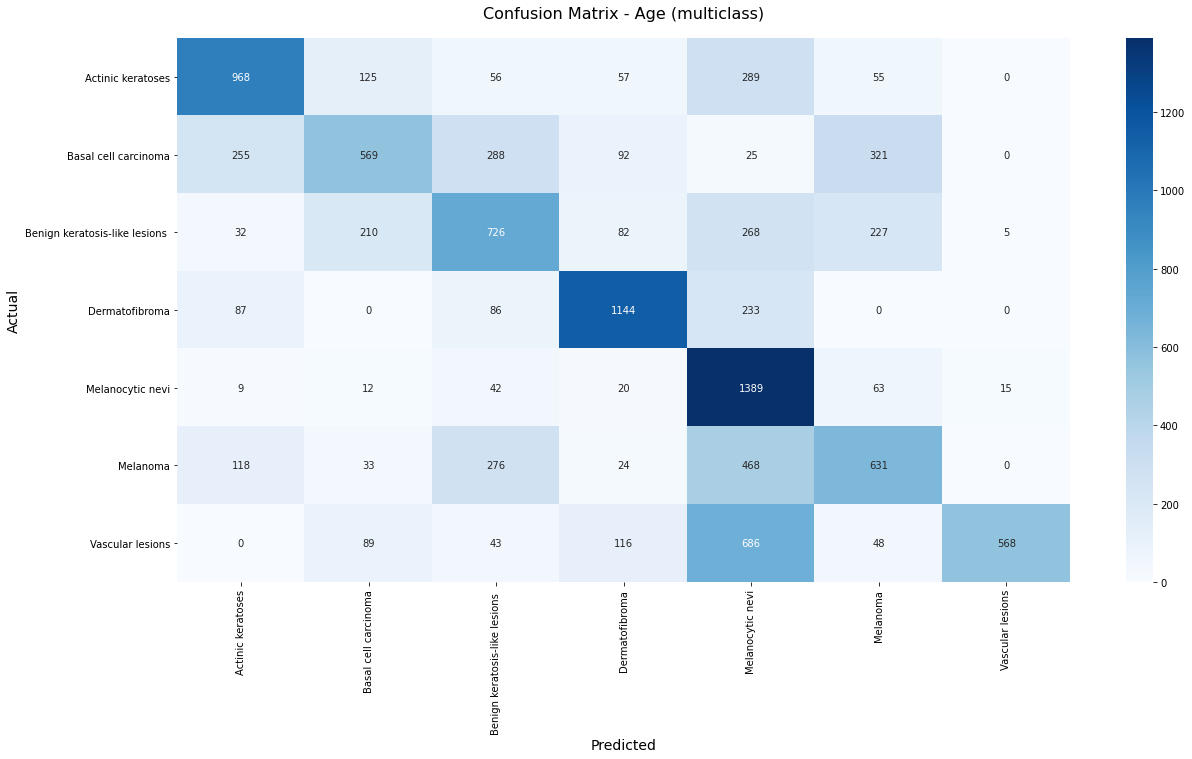

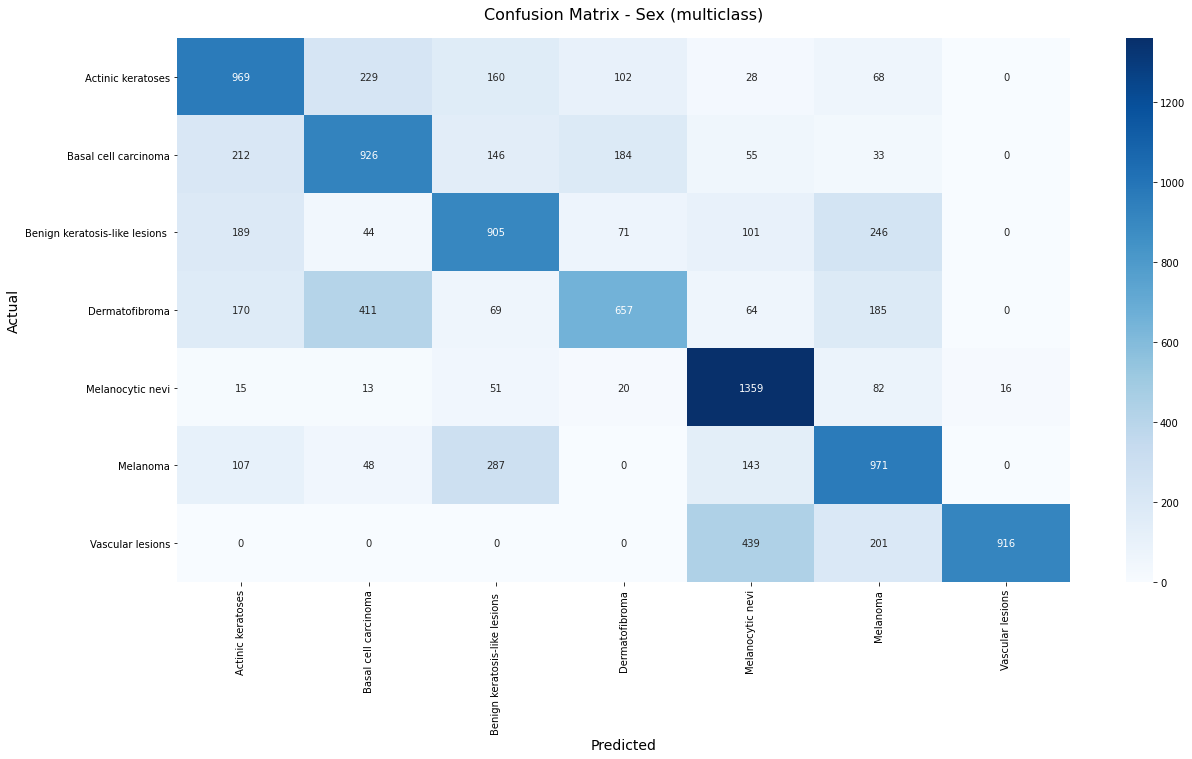

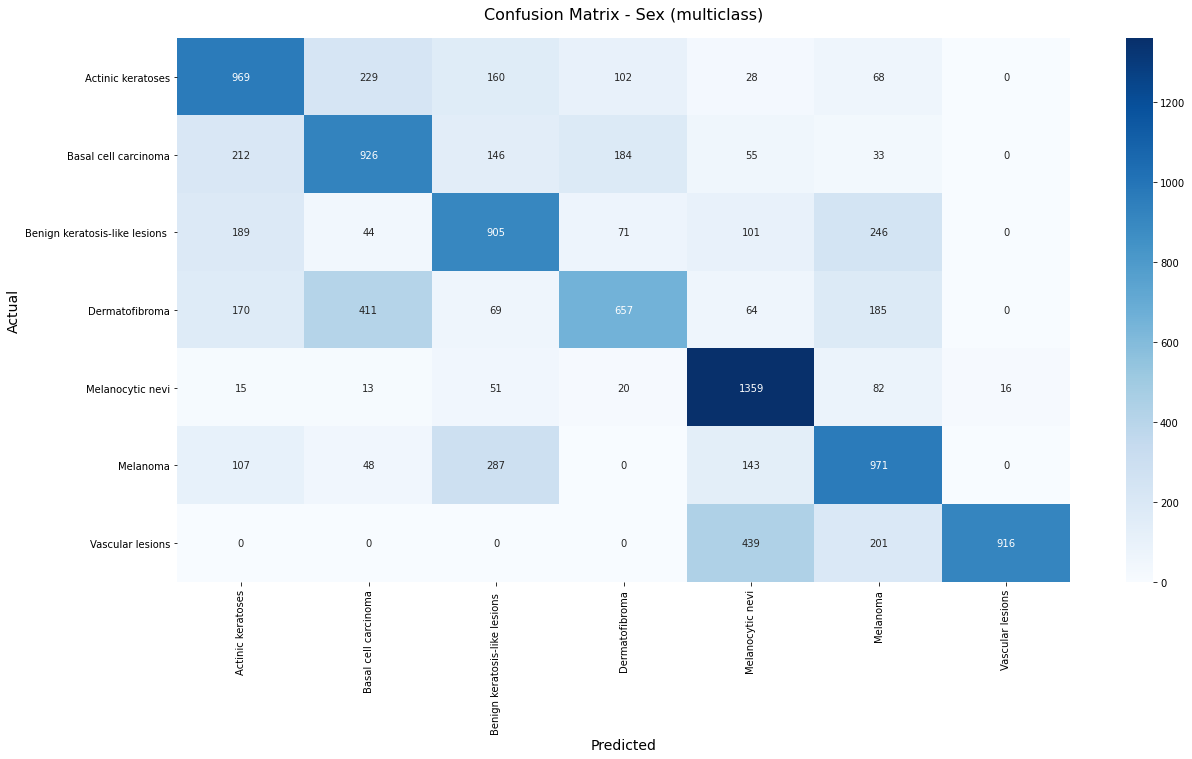

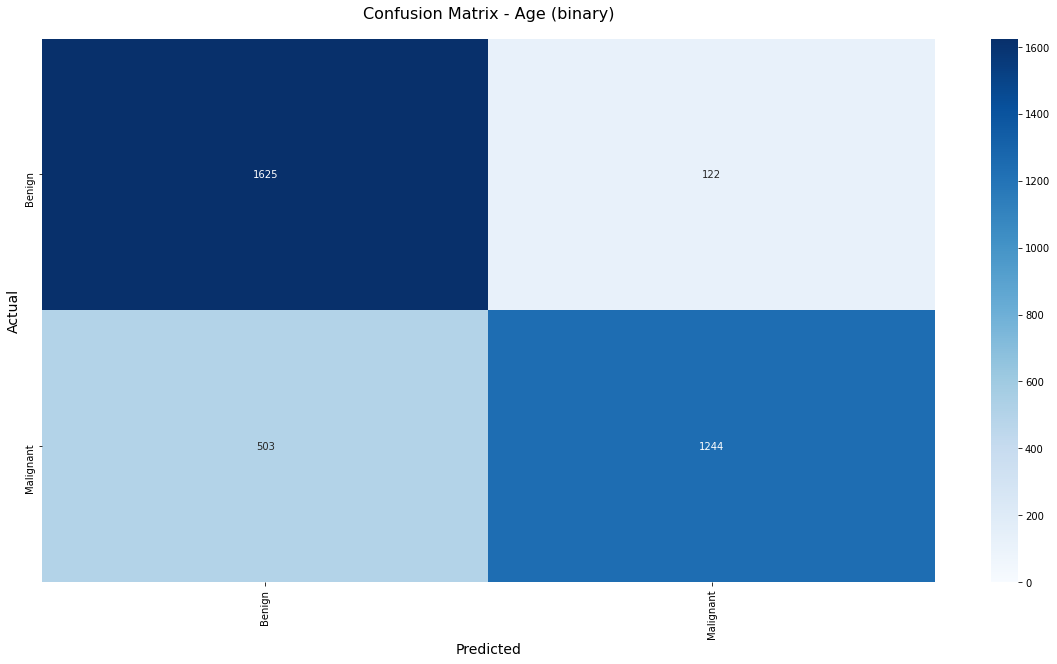

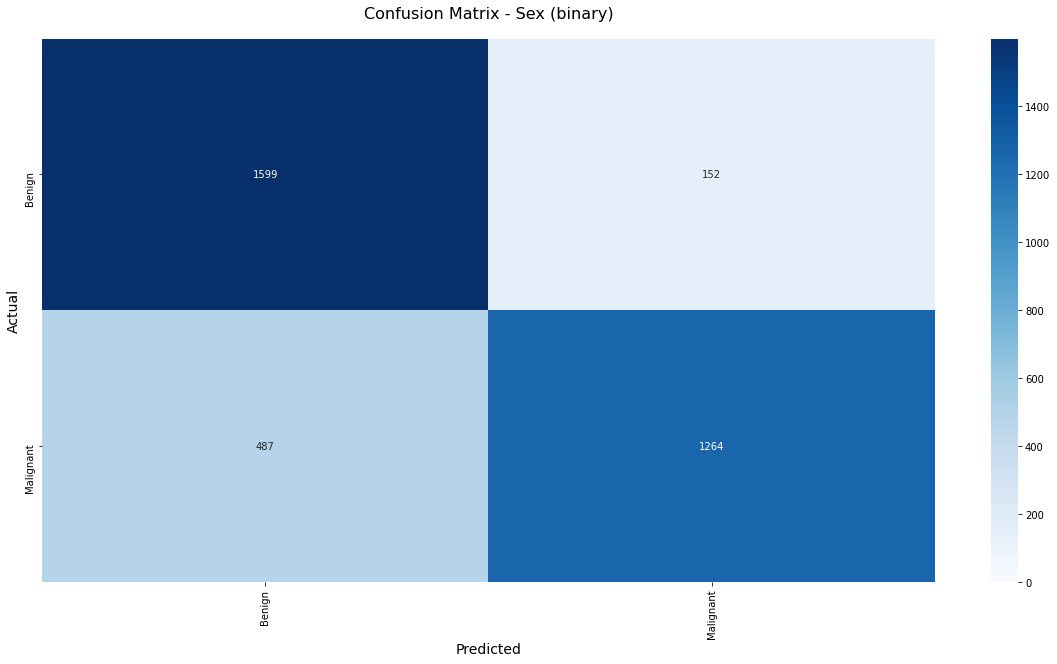

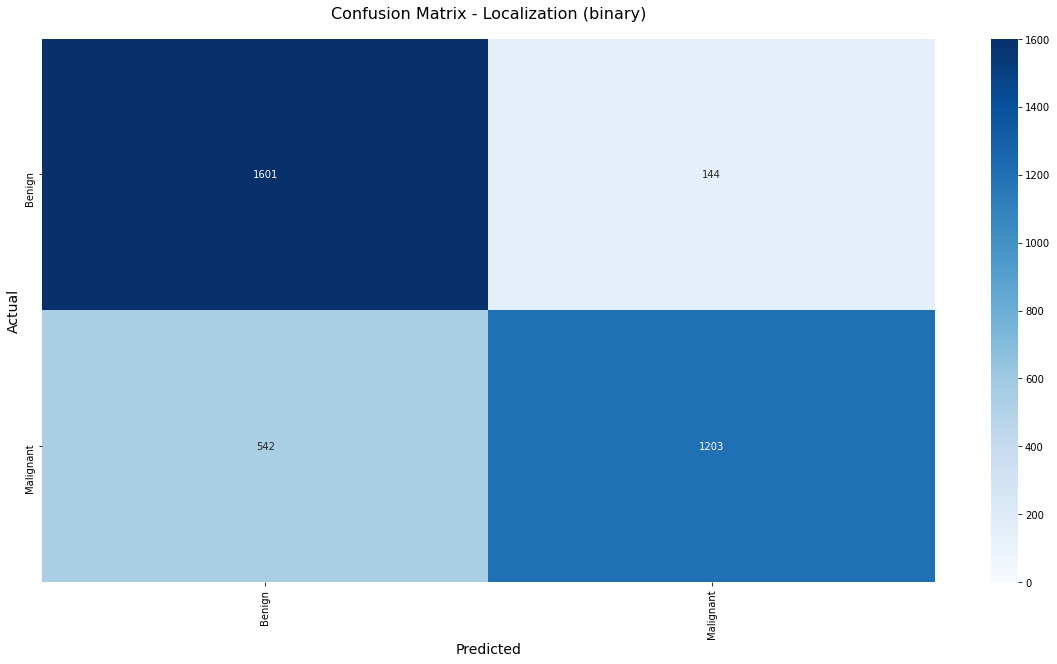

In [14]:
# Aggregated confusion matrices

lesion_types = ['Benign', 'Malignant']

cm_multi_age_young = pd.DataFrame(confusion_matrix(multi_y_test[2], multi_y_pred[2]),columns = lesions, index = lesions)
cm_multi_age_old = pd.DataFrame(confusion_matrix(multi_y_test[3], multi_y_pred[3]),columns = lesions, index = lesions)
cm_multi_sex_male = pd.DataFrame(confusion_matrix(multi_y_test[4], multi_y_pred[4]),columns = lesions, index = lesions)
cm_multi_sex_female = pd.DataFrame(confusion_matrix(multi_y_test[5], multi_y_pred[5]),columns = lesions, index = lesions)
cm_multi_loc_sun = pd.DataFrame(confusion_matrix(multi_y_test[6], multi_y_pred[6]),columns = lesions, index = lesions)
cm_multi_loc_no_sun = pd.DataFrame(confusion_matrix(multi_y_test[7], multi_y_pred[7]),columns = lesions, index = lesions)
cm_binary_age_young = pd.DataFrame(confusion_matrix(binary_y_test[2], binary_y_pred[2]),columns = lesion_types, index = lesion_types)
cm_binary_age_old = pd.DataFrame(confusion_matrix(binary_y_test[3], binary_y_pred[3]),columns = lesion_types, index = lesion_types)
cm_binary_sex_male = pd.DataFrame(confusion_matrix(binary_y_test[4], binary_y_pred[4]),columns = lesion_types, index = lesion_types)
cm_binary_sex_female = pd.DataFrame(confusion_matrix(binary_y_test[5], binary_y_pred[5]),columns = lesion_types, index = lesion_types)
cm_binary_loc_sun = pd.DataFrame(confusion_matrix(binary_y_test[6], binary_y_pred[6]),columns = lesion_types, index = lesion_types)
cm_binary_loc_no_sun = pd.DataFrame(confusion_matrix(binary_y_test[7], binary_y_pred[7]),columns = lesion_types, index = lesion_types)

cm_multi_age = cm_multi_age_young + cm_multi_age_old
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_multi_age, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Age (multiclass)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Age (multiclass).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

cm_multi_sex = cm_multi_sex_male + cm_multi_sex_female
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_multi_sex, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Sex (multiclass)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Sex (multiclass).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

cm_multi_loc = cm_multi_sex_male + cm_multi_sex_female
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_multi_loc, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Sex (multiclass)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Sex (multiclass).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

cm_binary_age = cm_binary_age_young + cm_binary_age_old
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_binary_age, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Age (binary)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Age (binary).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

cm_binary_sex = cm_binary_sex_male + cm_binary_sex_female
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_binary_sex, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Sex (binary)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Sex (binary).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

cm_binary_loc = cm_binary_loc_sun + cm_binary_loc_no_sun
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cm_binary_loc, annot = True, fmt = 'g' ,vmin = 0,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14)    
ax.set_title('Confusion Matrix - Localization (binary)',fontsize = 16,pad=20);
filename = ('Confusion Matrix - Localization (binary).png')
plt.savefig(os.path.join(data_folder,filename), dpi=600)
plt.show()

In [7]:
# Define performance metrics

count_inst = [9761,9761,4027,5734,5308,4453,4378,5383]

def metrics (y_test,y_pred): # Derived from: https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py

  cnf_matrix = confusion_matrix(y_test, y_pred)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  recall = TP/(TP+FN)
  precision = TP/(TP+FP)
  F1 = 2*((precision*recall)/(precision+recall))
  return recall, precision, F1

# Multiclass metrics
m_Precision_akiec = []
m_Precision_bcc = []
m_Precision_mel = []
m_Recall_akiec = []
m_Recall_bcc = []
m_Recall_mel = []
m_F1_akiec = []
m_F1_bcc = []
m_F1_mel = []

for i in range(len(multi_y_test)):  
  x = metrics(multi_y_test[i], multi_y_pred[i])
  m_Precision_akiec.append(round((x[1][0])*100,2))
  m_Precision_bcc.append(round((x[1][1])*100,2))
  m_Precision_mel.append(round((x[1][5])*100,2))
  m_Recall_akiec.append(round((x[0][0])*100,2))
  m_Recall_bcc.append(round((x[0][1])*100,2))
  m_Recall_mel.append(round((x[0][5])*100,2))
  m_F1_akiec.append(round((x[2][0])*100,2))
  m_F1_bcc.append(round((x[2][1])*100,2))
  m_F1_mel.append(round((x[2][5])*100,2))

# Binary metrics
b_Recall = []
b_Precision = []
b_F1 =  []

for i in range(len(binary_y_test)):  
  x = precision_recall_fscore_support(binary_y_test[i], binary_y_pred[i],average = 'binary')
  b_Precision.append(round(x[0]*100,2))
  b_Recall.append(round(x[1]*100,2))
  b_F1.append(round(x[2]*100,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [8]:
# Plot ROC curves

b_fprs = []
b_tprs = []
b_threshs = []
b_auc_scores = []

for i in range(len(binary_y_test)):  
  fpr, tpr, thresh = roc_curve(binary_y_test[i], binary_y_pred_probs[i][:,1], pos_label=1)
  auc_score = roc_auc_score(binary_y_test[i], binary_y_pred_probs[i][:,1])
  b_fprs.append(fpr)
  b_tprs.append(tpr)
  b_threshs.append(thresh)
  b_auc_scores.append(round(auc_score*100,2))

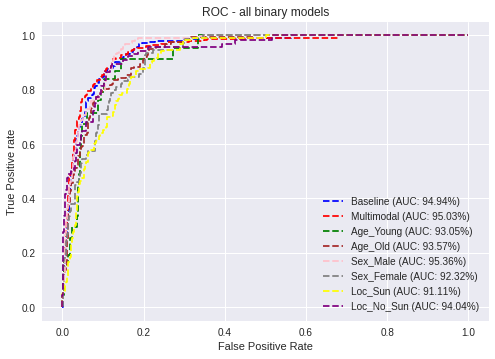

In [9]:
plt.style.use('seaborn')
plt.plot(b_fprs[0], b_tprs[0], linestyle='--',color='blue', label='Baseline (AUC: '+ str(b_auc_scores[0]) + '%)')
plt.plot(b_fprs[1], b_tprs[1], linestyle='--',color='red', label='Multimodal (AUC: '+ str(b_auc_scores[1]) + '%)')
plt.plot(b_fprs[2], b_tprs[2], linestyle='--',color='green', label='Age_Young (AUC: '+ str(b_auc_scores[2]) + '%)')
plt.plot(b_fprs[3], b_tprs[3], linestyle='--',color='brown', label='Age_Old (AUC: '+ str(b_auc_scores[3]) + '%)')
plt.plot(b_fprs[4], b_tprs[4], linestyle='--',color='pink', label='Sex_Male (AUC: '+ str(b_auc_scores[4]) + '%)')
plt.plot(b_fprs[5], b_tprs[5], linestyle='--',color='gray', label='Sex_Female (AUC: '+ str(b_auc_scores[5]) + '%)')
plt.plot(b_fprs[6], b_tprs[6], linestyle='--',color='yellow', label='Loc_Sun (AUC: '+ str(b_auc_scores[6]) + '%)')
plt.plot(b_fprs[7], b_tprs[7], linestyle='--',color='purple', label='Loc_No_Sun (AUC: '+ str(b_auc_scores[7]) + '%)')
# title
plt.title('ROC - all binary models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC_all.png'),dpi=600)
plt.show();


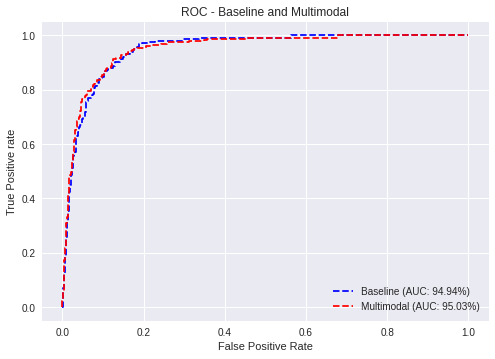

In [10]:
plt.style.use('seaborn')
plt.plot(b_fprs[0], b_tprs[0], linestyle='--',color='blue', label='Baseline (AUC: '+ str(b_auc_scores[0]) + '%)')
plt.plot(b_fprs[1], b_tprs[1], linestyle='--',color='red', label='Multimodal (AUC: '+ str(b_auc_scores[1]) + '%)')

plt.title('ROC - Baseline and Multimodal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC_BM.png'),dpi=600)
plt.show();


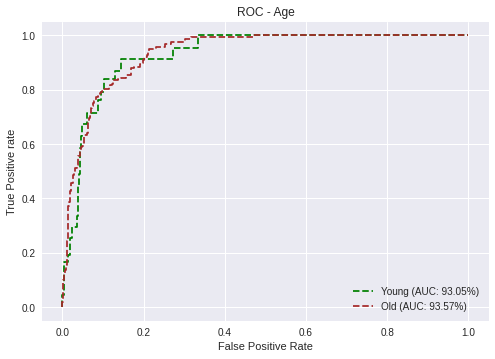

In [11]:
plt.style.use('seaborn')
plt.plot(b_fprs[2], b_tprs[2], linestyle='--',color='green', label='Young (AUC: '+ str(b_auc_scores[2]) + '%)')
plt.plot(b_fprs[3], b_tprs[3], linestyle='--',color='brown', label='Old (AUC: '+ str(b_auc_scores[3]) + '%)')
#plt.title('ROC curves of binary Age models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC - Age')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC_age.png'),dpi=600)
plt.show();


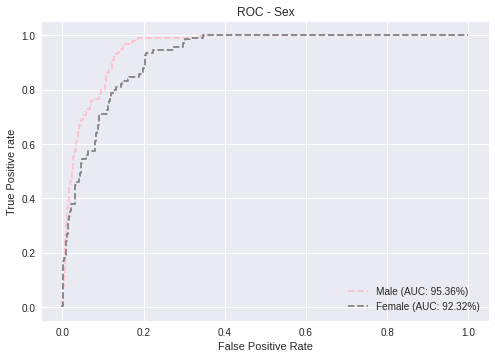

In [12]:
plt.style.use('seaborn')
plt.plot(b_fprs[4], b_tprs[4], linestyle='--',color='pink', label='Male (AUC: '+ str(b_auc_scores[4]) + '%)')
plt.plot(b_fprs[5], b_tprs[5], linestyle='--',color='grey', label='Female (AUC: '+ str(b_auc_scores[5]) + '%)')
#plt.title('ROC curves of binary Sex models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC - Sex')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC_sex.png'),dpi=600)
plt.show();


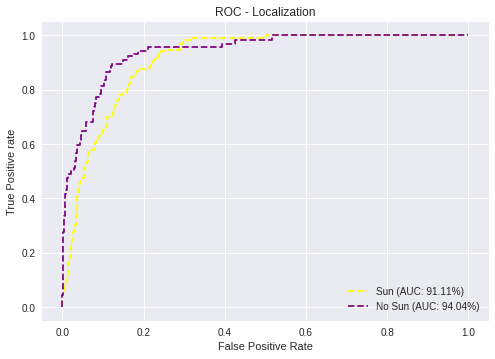

In [13]:
plt.style.use('seaborn')
plt.plot(b_fprs[6], b_tprs[6], linestyle='--',color='yellow', label='Sun (AUC: '+ str(b_auc_scores[6]) + '%)')
plt.plot(b_fprs[7], b_tprs[7], linestyle='--',color='purple', label='No Sun (AUC: '+ str(b_auc_scores[7]) + '%)')
#plt.title('ROC curves of binary Localization models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC - Localization')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC_loc.png'),dpi=600)
plt.show();


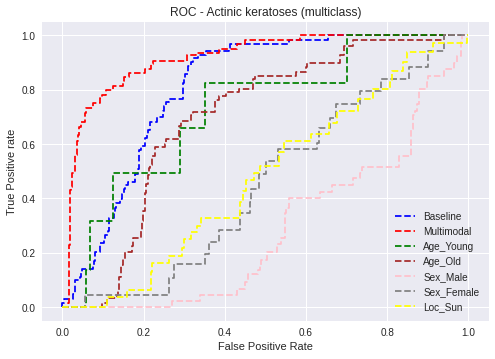

In [41]:
fprs = []
tprs = []
threshs = []

for i in range(7):
  fpr, tpr, thresh = roc_curve(multi_y_test[i], multi_y_pred_probs[i][:,i], pos_label=1)
  fprs.append(fpr)
  tprs.append(tpr)
  threshs.append(thresh)
    
plt.plot(fprs[0], tprs[0], linestyle='--',color='blue', label='Baseline')
plt.plot(fprs[1], tprs[1], linestyle='--',color='red', label='Multimodal')
plt.plot(fprs[2], tprs[2], linestyle='--',color='green', label='Age_Young')
plt.plot(fprs[3], tprs[3], linestyle='--',color='brown', label='Age_Old')
plt.plot(fprs[4], tprs[4], linestyle='--',color='pink', label='Sex_Male')
plt.plot(fprs[5], tprs[5], linestyle='--',color='gray', label='Sex_Female')
plt.plot(fprs[6], tprs[6], linestyle='--',color='yellow', label='Loc_Sun')
#plt.plot(fprs[7], tprs[7], linestyle='--',color='purple', label='Loc_No_Sun')

plt.title('ROC - Actinic keratoses (multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC - Actinic keratoses (multiclass)'),dpi=600)
plt.show();  

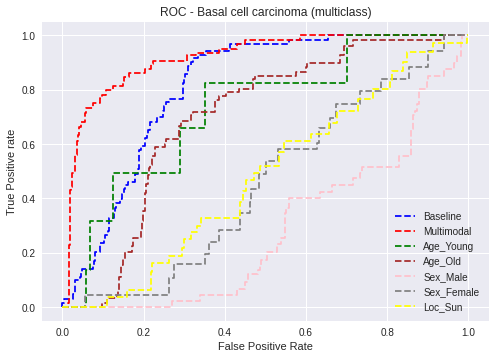

In [42]:
fprs = []
tprs = []
threshs = []

for i in range(7):
  fpr, tpr, thresh = roc_curve(multi_y_test[i], multi_y_pred_probs[i][:,i], pos_label=1)
  fprs.append(fpr)
  tprs.append(tpr)
  threshs.append(thresh)
   
plt.plot(fprs[0], tprs[0], linestyle='--',color='blue', label='Baseline')
plt.plot(fprs[1], tprs[1], linestyle='--',color='red', label='Multimodal')
plt.plot(fprs[2], tprs[2], linestyle='--',color='green', label='Age_Young')
plt.plot(fprs[3], tprs[3], linestyle='--',color='brown', label='Age_Old')
plt.plot(fprs[4], tprs[4], linestyle='--',color='pink', label='Sex_Male')
plt.plot(fprs[5], tprs[5], linestyle='--',color='gray', label='Sex_Female')
plt.plot(fprs[6], tprs[6], linestyle='--',color='yellow', label='Loc_Sun')
#plt.plot(fprs[7], tprs[7], linestyle='--',color='purple', label='Loc_No_Sun')

plt.title('ROC - Basal cell carcinoma (multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC - Basal cell carcinoma (multiclass)'),dpi=600)
plt.show(); 

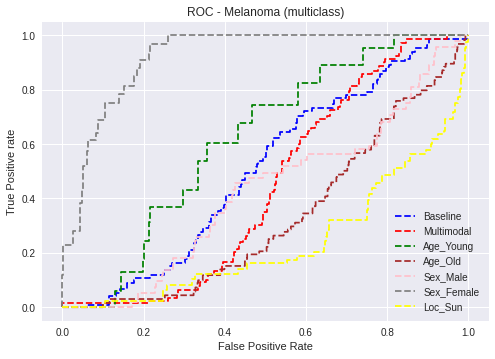

In [43]:
fprs = []
tprs = []
threshs = []

for i in range(7):
  fpr, tpr, thresh = roc_curve(multi_y_test[i], multi_y_pred_probs[i][:,i], pos_label=5)
  fprs.append(fpr)
  tprs.append(tpr)
  threshs.append(thresh)

plt.plot(fprs[0], tprs[0], linestyle='--',color='blue', label='Baseline')
plt.plot(fprs[1], tprs[1], linestyle='--',color='red', label='Multimodal')
plt.plot(fprs[2], tprs[2], linestyle='--',color='green', label='Age_Young')
plt.plot(fprs[3], tprs[3], linestyle='--',color='brown', label='Age_Old')
plt.plot(fprs[4], tprs[4], linestyle='--',color='pink', label='Sex_Male')
plt.plot(fprs[5], tprs[5], linestyle='--',color='gray', label='Sex_Female')
plt.plot(fprs[6], tprs[6], linestyle='--',color='yellow', label='Loc_Sun')
#plt.plot(fprs[7], tprs[7], linestyle='--',color='purple', label='Loc_No_Sun')

plt.title('ROC - Melanoma (multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig(os.path.join(data_folder, 'ROC - Melanoma (multiclass)'),dpi=600)
plt.show(); 

In [39]:
# Performance overview - multiclass
comparison_multi = {'Models': models,'Count (n)':count_inst, 'Precision_akiec (%)':m_Precision_akiec, 'Precision_bcc (%)':m_Precision_bcc, 'Precision_mel (%)':m_Precision_mel, 
                    'Recall_akiec (%)':m_Recall_akiec, 'Recall_bcc (%)':m_Recall_bcc, 'Recall_mel (%)':m_Recall_mel, 'F1_akiec (%)':m_F1_akiec, 'F1_bcc (%)':m_F1_bcc, 'F1_mel (%)':m_F1_mel}
print(tabulate(comparison_multi, headers='keys'))

Models        Count (n)    Precision_akiec (%)    Precision_bcc (%)    Precision_mel (%)    Recall_akiec (%)    Recall_bcc (%)    Recall_mel (%)    F1_akiec (%)    F1_bcc (%)    F1_mel (%)
----------  -----------  ---------------------  -------------------  -------------------  ------------------  ----------------  ----------------  --------------  ------------  ------------
Baseline           9761                  40.91                51.37                56.43               37.42             50.45             56.03           39.09         50.91         56.23
Multimodal         9761                  49.15                60.14                57.09               42.68             71.76             61.75           45.69         65.44         59.33
Age_Young          4027                  73.32                47.13                38.12               68.26             16.33             31.74           70.7          24.26         34.64
Age_Old            5734                  59.11         

In [40]:
# Performance overview - binary
comparison_binary = {'Models': models, 'Precision (%)':b_Precision, 'Recall (%)':b_Recall, 'F1_Score (%)':b_F1, 'AUC (%)':b_auc_scores}
print(tabulate(comparison_binary, headers='keys'))

Models        Precision (%)    Recall (%)    F1_Score (%)    AUC (%)
----------  ---------------  ------------  --------------  ---------
Baseline              91.05         80.75           85.59      94.94
Multimodal            91.93         80.01           85.56      95.03
Age_Young             93.03         63.17           75.25      93.05
Age_Old               89.82         77.72           83.33      93.57
Sex_Male              89.99         76.65           82.79      95.36
Sex_Female            88.33         67.04           76.22      92.32
Loc_Sun               86.52         69.99           77.38      91.11
Loc_No_Sun            91.55         68.16           78.15      94.04
